<a href="https://colab.research.google.com/github/nigma97/MLProjectPIU/blob/main/170243L_pump_it_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold,train_test_split,KFold
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve, KFold, train_test_split
from xgboost import XGBClassifier
import pandas as pd
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
# from collections import Counter
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train_set = pd.read_csv('/content/drive/My Drive/MLproject/training_set_values.csv')
df_train_labels = pd.read_csv('/content/drive/My Drive/MLproject/training_set_labels.csv')

In [4]:
df_train_set.shape

(59400, 40)

In [5]:
df_train_set.head()


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
df_train_set.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [7]:
test_set_values = pd.read_csv('/content/drive/My Drive/MLproject/test_set_values.csv')

In [8]:
test_set_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [9]:
test_set_values.shape

(14850, 40)

In [10]:
len_data = len(df_train_set)
dataset =  pd.concat(objs=[df_train_set, test_set_values], axis=0).reset_index(drop=True)
df = dataset.copy()
df['status_group'] = df_train_labels['status_group']

In [11]:
dataset.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    4504
gps_height                   0
installer                 4532
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4155
recorded_by                  0
scheme_management         4846
scheme_name              35258
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [12]:
df.shape

(74250, 41)

In [13]:
df.drop(columns=['date_recorded'],inplace=True )

In [14]:
df_train_set.set_index('id',inplace=True)

In [15]:
df_train_labels.set_index('id',inplace=True)

In [16]:
#df = pd.merge(df_train_labels, df_train_set, how = 'inner', left_index = True,right_index=True)

In [17]:
df.reset_index(inplace=True)

In [18]:
df.isna().sum()

index                        0
id                           0
amount_tsh                   0
funder                    4504
gps_height                   0
installer                 4532
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4155
recorded_by                  0
scheme_management         4846
scheme_name              35258
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [19]:
test_set_values.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [20]:
df.describe()

,index,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,37124.500000,37124.500000,318.685704,665.667313,34.074262,-5.701771e+00,0.462330,15.265414,5.629077,180.750828,1298.463650
std,21434.273081,21434.273081,2906.762364,692.761033,6.572519,2.944969e+00,11.537879,17.508907,9.641636,471.086120,952.349375
min,0.000000,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18562.250000,18562.250000,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37124.500000,37124.500000,0.000000,364.000000,34.907475,-5.026540e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55686.750000,55686.750000,20.000000,1317.000000,37.181685,-3.325058e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74249.000000,74249.000000,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [21]:
df['scheme_management'].value_counts()

VWC                 45917
WUG                  6496
Water authority      3975
WUA                  3551
Water Board          3462
Parastatal           2124
Company              1341
Private operator     1326
Other                 996
SWC                   123
Trust                  92
None                    1
Name: scheme_management, dtype: int64

In [22]:
df['management'].value_counts()

vwc                 50624
wug                  8108
water board          3688
wua                  3118
private operator     2504
parastatal           2229
water authority      1123
other                1083
company               859
unknown               683
other - school        126
trust                 105
Name: management, dtype: int64

In [23]:
df['quantity'].value_counts()

enough          41522
insufficient    18896
dry              7782
seasonal         5075
unknown           975
Name: quantity, dtype: int64

In [24]:
df['quantity_group'].value_counts()

enough          41522
insufficient    18896
dry              7782
seasonal         5075
unknown           975
Name: quantity_group, dtype: int64

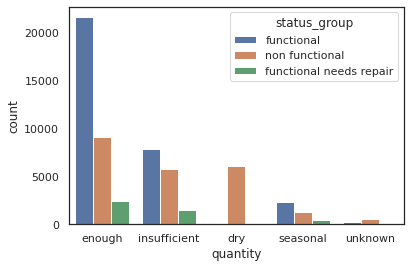

In [25]:
ax = sns.countplot(x='quantity', hue="status_group", data=df)

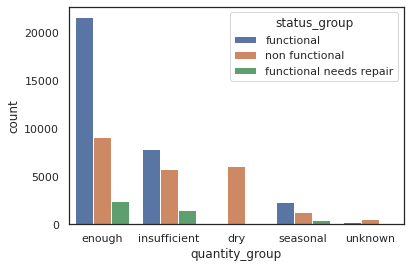

In [26]:
ax = sns.countplot(x='quantity_group', hue="status_group", data=df)

In [27]:
df['source'].value_counts()

spring                  21216
shallow well            21140
machine dbh             13822
river                   11964
rainwater harvesting     2863
hand dtw                 1108
lake                      950
dam                       840
other                     261
unknown                    86
Name: source, dtype: int64

In [28]:
df['source_type'].value_counts()

spring                  21216
shallow well            21140
borehole                14930
river/lake              12914
rainwater harvesting     2863
dam                       840
other                     347
Name: source_type, dtype: int64

In [29]:
df['source_class'].value_counts()

groundwater    57286
surface        16617
unknown          347
Name: source_class, dtype: int64

In [30]:
df.groupby(['source_class','source']).count()

index  ...  status_group
source_class source                       ...              
groundwater  hand dtw               1108  ...           874
             machine dbh           13822  ...         11075
             shallow well          21140  ...         16824
             spring                21216  ...         17021
surface      dam                     840  ...           656
             lake                    950  ...           765
             rainwater harvesting   2863  ...          2295
             river                 11964  ...          9612
unknown      other                   261  ...           212
             unknown                  86  ...            66

[10 rows x 39 columns]

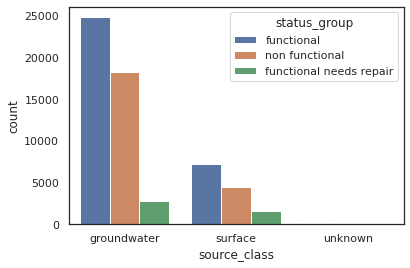

In [31]:
ax = sns.countplot(x='source_class', hue="status_group", data=df)

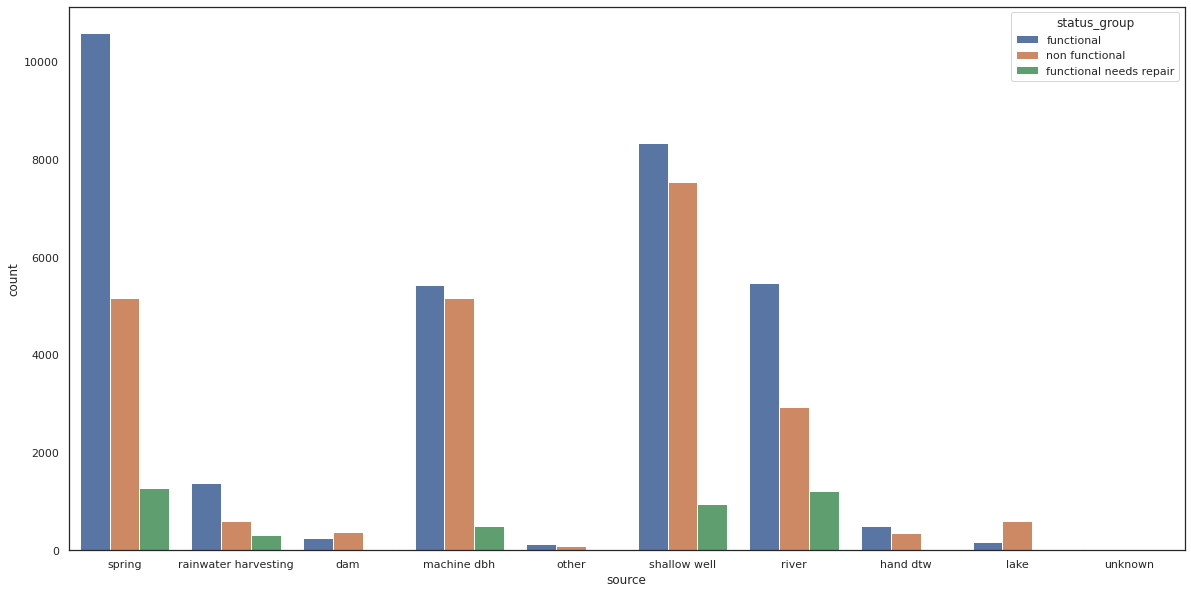

In [32]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source', hue="status_group", data=df)

In [33]:
df['water_quality'].value_counts()

soft                  63505
salty                  6082
unknown                2345
milky                  1005
coloured                623
salty abandoned         423
fluoride                244
fluoride abandoned       23
Name: water_quality, dtype: int64

In [34]:
df['quality_group'].value_counts()

good        63505
salty        6505
unknown      2345
milky        1005
colored       623
fluoride      267
Name: quality_group, dtype: int64

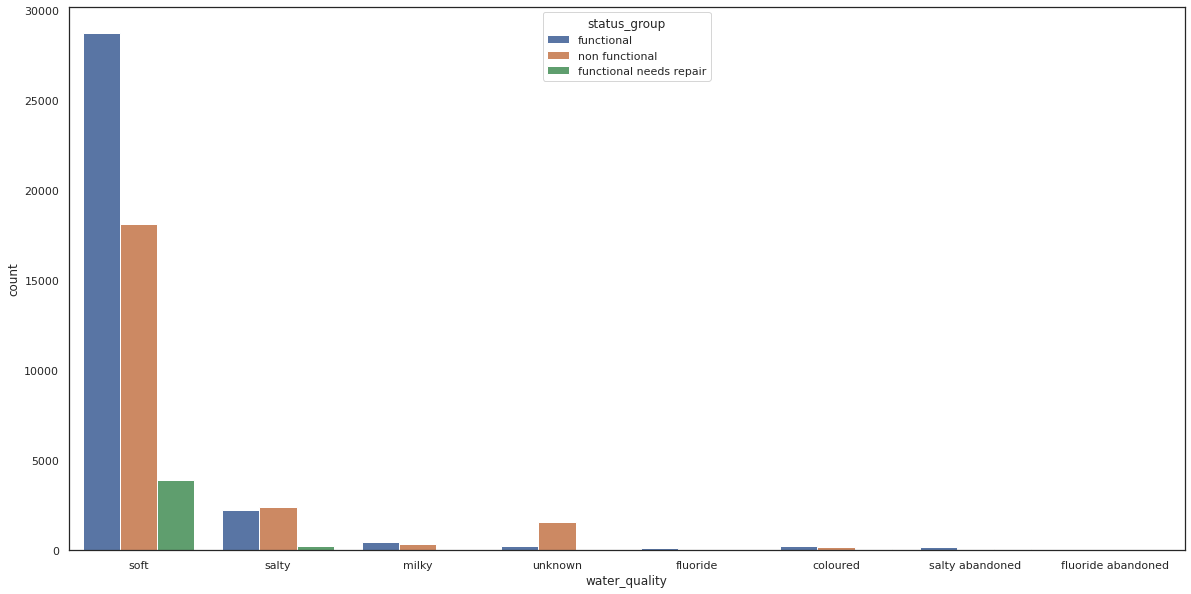

In [35]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df)

In [36]:
df['water_quality'].value_counts()

soft                  63505
salty                  6082
unknown                2345
milky                  1005
coloured                623
salty abandoned         423
fluoride                244
fluoride abandoned       23
Name: water_quality, dtype: int64

In [37]:
df['quality_group'].value_counts()

good        63505
salty        6505
unknown      2345
milky        1005
colored       623
fluoride      267
Name: quality_group, dtype: int64

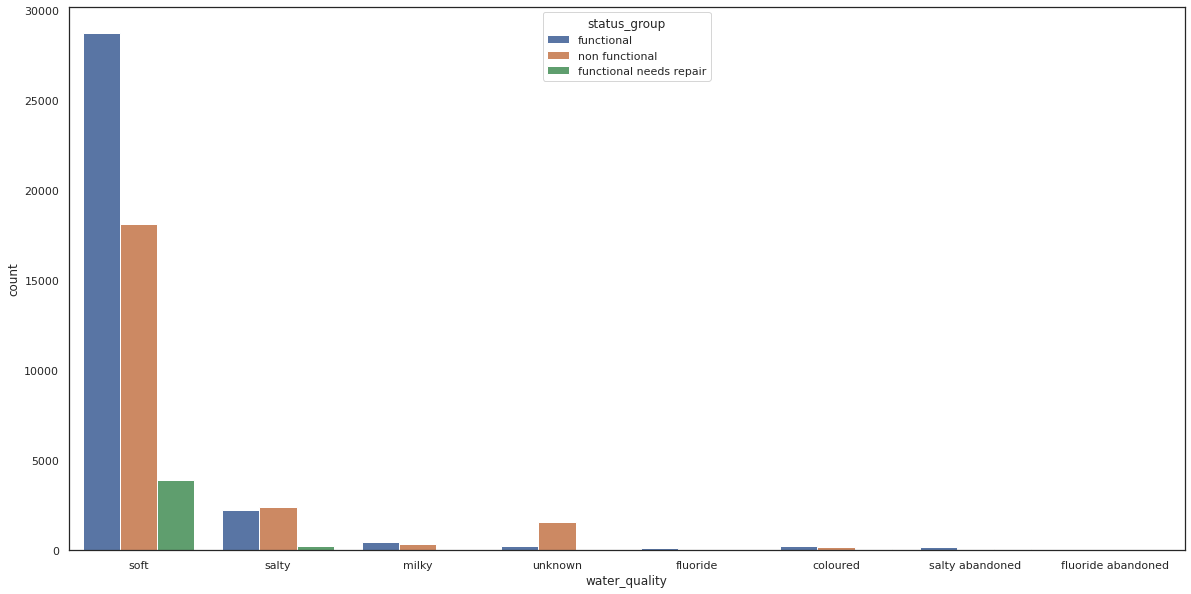

In [38]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df)

In [39]:
df['payment'].value_counts()

never pay                31712
pay per bucket           11266
pay monthly              10397
unknown                  10149
pay when scheme fails     4842
pay annually              4570
other                     1314
Name: payment, dtype: int64

In [40]:
df['payment_type'].value_counts()

never pay     31712
per bucket    11266
monthly       10397
unknown       10149
on failure     4842
annually       4570
other          1314
Name: payment_type, dtype: int64

In [41]:
df['extraction_type'].value_counts()

gravity                      33263
nira/tanira                  10205
other                         8102
submersible                   5982
swn 80                        4588
mono                          3628
india mark ii                 3029
afridev                       2208
ksb                           1790
other - rope pump              572
other - swn 81                 284
windmill                       152
india mark iii                 135
cemo                           108
other - play pump              101
walimi                          60
climax                          41
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [42]:
df['extraction_type_group'].value_counts()

gravity            33263
nira/tanira        10205
other               8102
submersible         7772
swn 80              4588
mono                3628
india mark ii       3029
afridev             2208
rope pump            572
other handpump       447
wind-powered         152
other motorpump      149
india mark iii       135
Name: extraction_type_group, dtype: int64

In [43]:
df['extraction_type_class'].value_counts()

gravity         33263
handpump        20612
other            8102
submersible      7772
motorpump        3777
rope pump         572
wind-powered      152
Name: extraction_type_class, dtype: int64

In [44]:
df.groupby(['extraction_type_class', 'extraction_type', 'extraction_type_group']).count()

index  ...  status_group
extraction_type_class extraction_type           extraction_type_group         ...              
gravity               gravity                   gravity                33263  ...         26780
handpump              afridev                   afridev                 2208  ...          1770
                      india mark ii             india mark ii           3029  ...          2400
                      india mark iii            india mark iii           135  ...            98
                      nira/tanira               nira/tanira            10205  ...          8154
                      other - mkulima/shinyanga other handpump             2  ...             2
                      other - play pump         other handpump           101  ...            85
                      other - swn 81            other handpump           284  ...           229
                      swn 80                    swn 80                  4588  ...          3670
                      walimi                    other handpump            60  ...            48
motorpump             cemo                      other motorpump          108  ...            90
                      climax                    other motorpump           41  ...            32
                      mono                      mono                    3628  ...          2865
other                 other                     other                   8102  ...          6430
rope pump             other - rope pump         rope pump                572  ...           451
submersible           ksb                       submersible             1790  ...          1415
                      submersible               submersible             5982  ...          4764
wind-powered          windmill                  wind-powered             152  ...           117

[18 rows x 38 columns]

In [45]:
df['waterpoint_type'].value_counts()

communal standpipe             35628
hand pump                      21884
other                           8010
communal standpipe multiple     7611
improved spring                  959
cattle trough                    150
dam                                8
Name: waterpoint_type, dtype: int64

In [46]:
df['waterpoint_type_group'].value_counts()

communal standpipe    43239
hand pump             21884
other                  8010
improved spring         959
cattle trough           150
dam                       8
Name: waterpoint_type_group, dtype: int64

In [47]:
df.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group'],inplace=True )

In [48]:
df['construction_year'].value_counts()

0       25969
2010     3314
2008     3243
2009     3196
2000     2578
2007     1960
2006     1892
2011     1591
2003     1579
2004     1417
2012     1347
2002     1343
1995     1283
2005     1275
1978     1267
1999     1222
1998     1190
1985     1177
1990     1176
1996     1020
1980     1005
1984      970
1994      940
1982      926
1972      892
1997      821
1974      814
1992      807
1993      745
2001      680
1988      657
1983      594
1975      561
1986      553
1976      525
1970      493
1991      407
1989      396
1987      370
1981      291
1977      247
1979      245
1973      227
2013      209
1971      177
1960      124
1963      107
1967      106
1968       93
1969       77
1964       48
1962       36
1961       28
1965       21
1966       19
Name: construction_year, dtype: int64

In [49]:
df['decade'] = df['construction_year']

In [50]:
df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [51]:
df['decade'].value_counts()

0      25969
00s    19163
90s     9611
80s     6939
10s     6461
70s     5448
60s      659
Name: decade, dtype: int64

In [52]:
df.loc[df['construction_year']!=0].describe()

,index,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,48281.000000,48281.000000,48281.000000,48281.000000,48281.000000,48281.000000,48281.000000,48281.000000,48281.000000,48281.000000,48281.000000
mean,37080.867546,37084.269609,469.739275,1000.202709,35.986840,-6.237147,0.693088,15.669559,5.967006,271.572233,1996.870943
std,21433.030676,21411.638110,3456.533934,618.538809,2.559941,2.760997,14.240205,20.937445,10.709279,552.329367,12.440524
min,0.000000,1.000000,0.000000,-63.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,0.000000,1960.000000
25%,18491.000000,18512.000000,0.000000,369.000000,34.676387,-8.744394,0.000000,4.000000,2.000000,30.000000,1988.000000
50%,37142.000000,37097.000000,0.000000,1153.000000,36.653857,-6.078797,0.000000,10.000000,3.000000,150.000000,2000.000000
75%,55598.000000,55548.000000,200.000000,1486.000000,37.814225,-3.654467,0.000000,16.000000,5.000000,312.000000,2008.000000
max,74249.000000,74249.000000,350000.000000,2777.000000,40.345193,-1.042375,1776.000000,99.000000,63.000000,30500.000000,2013.000000


In [53]:
df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)

In [54]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    74250
Name: recorded_by, dtype: int64

In [55]:
df.drop(columns=['recorded_by'],inplace=True )

In [56]:
df['installer'].value_counts().head(20)

DWE                   21751
Government             2282
RWE                    1498
Commu                  1347
DANIDA                 1305
KKKT                   1120
Hesawa                 1070
0                       980
TCRS                    887
CES                     765
Central government      764
DANID                   690
Community               687
HESAWA                  679
District Council        663
World vision            517
TASAF                   504
LGA                     501
WEDECO                  496
District council        490
Name: installer, dtype: int64

In [57]:
df.loc[df['longitude']==0]

,index,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_name,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,status_group,decade
21,21,6091,0.0,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,NaN,False,2000,swn 80,wug,unknown,unknown,unknown,shallow well,hand pump,functional,0
53,53,32376,0.0,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,Nyang'hwale,True,2000,submersible,vwc,unknown,unknown,dry,machine dbh,communal standpipe multiple,non functional,0
168,168,72678,0.0,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,NaN,False,2000,gravity,parastatal,other,soft,seasonal,rainwater harvesting,communal standpipe,functional,0
177,177,56725,0.0,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,NaN,False,2000,other,wug,unknown,soft,enough,shallow well,other,non functional,0
253,253,13042,0.0,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,NaN,True,2000,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,functional needs repair,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74049,74049,30454,0.0,Nyamigogo,0,MASWI,0.0,-2.000000e-08,Husein,0,Lake Victoria,Nyaweshi,Mwanza,19,6,Geita,Kharumwa,0,True,Borehole,True,2000,india mark ii,vwc,never pay,soft,insufficient,shallow well,hand pump,NaN,0
74076,74076,44766,0.0,Dwsp,0,DWE,0.0,-2.000000e-08,Imalanota,0,Lake Victoria,Busumabwi,Mwanza,17,1,Magu,Nkungulu,0,False,NaN,False,2000,swn 80,wug,other,soft,enough,shallow well,hand pump,NaN,0
74166,74166,56279,0.0,Government Of Tanzania,0,RWE,0.0,-2.000000e-08,Ofisini,0,Lake Victoria,Madukani,Mwanza,19,2,Magu,Mkula,0,True,Kalemela Water Supply,True,2000,gravity,vwc,never pay,soft,insufficient,lake,communal standpipe multiple,NaN,0
74231,74231,37994,0.0,Hesawa,0,DWE,0.0,-2.000000e-08,Kwa Masilili,0,Lake Victoria,Solima A,Mwanza,19,2,Magu,Kabita,0,True,NaN,True,2000,nira/tanira,vwc,never pay,salty,enough,shallow well,hand pump,NaN,0


In [58]:
df.loc[df['longitude']!=0].describe()

,index,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,71981.000000,71981.000000,71981.000000,71981.000000,71981.000000,71981.000000,71981.000000,71981.000000,71981.000000,71981.000000,71981.000000
mean,37116.747586,37117.739945,328.731381,686.650616,35.148358,-5.881503,0.476904,15.185091,5.728248,186.448493,1997.901196
std,21437.485525,21432.597850,2951.661960,693.280413,2.608924,2.808758,11.718023,17.775842,9.768536,477.341984,10.294211
min,0.000000,0.000000,0.000000,-90.000000,29.607122,-11.649440,0.000000,1.000000,0.000000,0.000000,1960.000000
25%,18547.000000,18565.000000,0.000000,0.000000,33.277747,-8.632576,0.000000,5.000000,2.000000,0.000000,1995.000000
50%,37104.000000,37122.000000,0.000000,418.000000,35.007072,-5.173950,0.000000,12.000000,3.000000,35.000000,2000.000000
75%,55672.000000,55684.000000,30.000000,1330.000000,37.237383,-3.371872,0.000000,17.000000,5.000000,230.000000,2005.000000
max,74249.000000,74249.000000,350000.000000,2777.000000,40.345193,-0.998464,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [59]:
df['longitude'].replace(to_replace = 0 , value =35.15, inplace=True)

In [60]:
df['wpt_name'].value_counts()

none                   4440
Shuleni                2183
Zahanati               1034
Msikitini               647
Kanisani                390
                       ... 
Kwa Nikolama Teru         1
Kwa Mzee Lugendo          1
Kwala Sekondari           1
Kwa Elizabeth Molel       1
Nsimbo Secondary          1
Name: wpt_name, Length: 45684, dtype: int64

In [61]:
df['scheme_name'].value_counts()

K                                               858
None                                            794
Borehole                                        704
Chalinze wate                                   501
M                                               490
                                               ... 
Sasa                                              1
BL Cosmas Woiso                                   1
Mradi wa maji wa mfalanyak                        1
Igongolo gravity water sch                        1
Kazilamihunda subgravity source water supply      1
Name: scheme_name, Length: 2868, dtype: int64

In [62]:
df.drop(columns=['wpt_name','scheme_name','region_code'],inplace=True )

In [63]:
df['region'].value_counts()

Iringa           6599
Shinyanga        6293
Mbeya            5758
Kilimanjaro      5494
Morogoro         5038
Kagera           4174
Arusha           4111
Mwanza           3897
Kigoma           3533
Pwani            3331
Ruvuma           3306
Tanga            3186
Dodoma           2779
Singida          2536
Tabora           2466
Mara             2451
Rukwa            2242
Mtwara           2144
Manyara          1972
Lindi            1920
Dar es Salaam    1020
Name: region, dtype: int64

In [64]:
df['population'].value_counts()

0       26834
1        8782
200      2370
150      2328
250      2087
        ...  
1193        1
593         1
1065        1
785         1
895         1
Name: population, Length: 1128, dtype: int64

In [65]:
df.loc[df['population']==0].groupby('status_group').count()

,index,id,amount_tsh,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,11274,11274,11274,10048,11274,10033,11274,11274,11274,11274,11071,11274,11274,11274,11274,11274,10700,10596,11274,11274,11274,11274,11274,11274,11274,11274,11274
functional needs repair,1775,1775,1775,1464,1775,1462,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1732,1613,1775,1775,1775,1775,1775,1775,1775,1775,1775
non functional,8332,8332,8332,7753,8332,7755,8332,8332,8332,8332,8174,8332,8332,8332,8332,8332,7967,8063,8332,8332,8332,8332,8332,8332,8332,8332,8332


In [66]:
df.loc[df['population']!=0].describe()

,index,id,amount_tsh,gps_height,longitude,latitude,num_private,district_code,population,construction_year
count,47416.000000,47416.000000,47416.000000,47416.000000,47416.000000,47416.000000,47416.000000,47416.000000,47416.000000,47416.000000
mean,37060.327421,37109.020394,447.783038,967.471254,36.078646,-6.140993,0.723975,6.300405,283.042623,1996.964379
std,21429.562428,21406.625880,3592.900978,612.979582,2.587554,2.736761,14.431650,11.327183,564.413842,12.397505
min,0.000000,1.000000,0.000000,-90.000000,29.607122,-11.649440,0.000000,1.000000,1.000000,1960.000000
25%,18483.750000,18541.750000,0.000000,344.000000,34.715217,-8.383484,0.000000,2.000000,40.000000,1988.000000
50%,37109.500000,37126.500000,0.000000,1133.000000,36.714568,-5.765866,0.000000,3.000000,150.000000,2000.000000
75%,55569.250000,55568.250000,100.000000,1461.000000,37.949838,-3.600882,0.000000,5.000000,328.000000,2008.000000
max,74249.000000,74249.000000,350000.000000,2777.000000,40.345193,-1.042375,1776.000000,67.000000,30500.000000,2013.000000


In [67]:
df['population'].replace(to_replace = 0 , value =281, inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  74250 non-null  int64  
 1   id                     74250 non-null  int64  
 2   amount_tsh             74250 non-null  float64
 3   funder                 69746 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   num_private            74250 non-null  int64  
 9   basin                  74250 non-null  object 
 10  subvillage             73780 non-null  object 
 11  region                 74250 non-null  object 
 12  district_code          74250 non-null  int64  
 13  lga                    74250 non-null  object 
 14  ward                   74250 non-null  object 
 15  po

In [69]:
df['subvillage'].nunique()

21425

In [70]:
df.drop(columns=['subvillage'],inplace=True )

In [71]:
df['public_meeting'].value_counts()

True     63749
False     6346
Name: public_meeting, dtype: int64

In [72]:
df['public_meeting'].fillna(value=True,inplace=True)

In [73]:
df['permit'].value_counts()

True     48606
False    21851
Name: permit, dtype: int64

In [74]:
df['permit'].fillna(value=True, inplace=True)

In [75]:
df['funder'] = pd.factorize(df['funder'])[0]
df['installer'] = pd.factorize(df['installer'])[0]
df['decade'] = pd.factorize(df['decade'])[0]
df['basin'] = pd.factorize(df['basin'])[0]
df['region'] = pd.factorize(df['region'])[0]
df['lga'] = pd.factorize(df['lga'])[0]
df['ward'] = pd.factorize(df['ward'])[0]
df['extraction_type_group'] = pd.factorize(df['extraction_type_group'])[0]
df['management'] = pd.factorize(df['management'])[0]
df['payment'] = pd.factorize(df['payment'])[0]
df['water_quality'] = pd.factorize(df['water_quality'])[0]
df['quantity'] = pd.factorize(df['quantity'])[0]
df['source'] = pd.factorize(df['source'])[0]
df['waterpoint_type'] = pd.factorize(df['waterpoint_type'])[0]

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  74250 non-null  int64  
 1   id                     74250 non-null  int64  
 2   amount_tsh             74250 non-null  float64
 3   funder                 74250 non-null  int64  
 4   gps_height             74250 non-null  int64  
 5   installer              74250 non-null  int64  
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   num_private            74250 non-null  int64  
 9   basin                  74250 non-null  int64  
 10  region                 74250 non-null  int64  
 11  district_code          74250 non-null  int64  
 12  lga                    74250 non-null  int64  
 13  ward                   74250 non-null  int64  
 14  population             74250 non-null  int64  
 15  pu

In [77]:
len_data

59400

In [78]:
df.shape

(74250, 27)

In [79]:
df.isna().sum()

index                        0
id                           0
amount_tsh                   0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
num_private                  0
basin                        0
region                       0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
permit                       0
construction_year            0
extraction_type_group        0
management                   0
payment                      0
water_quality                0
quantity                     0
source                       0
waterpoint_type              0
status_group             14850
decade                       0
dtype: int64

In [80]:
df.drop(columns=['status_group'],inplace=True )
X_train = df[:len_data]
test1 = df[len_data:]

In [81]:
test1.head()


,index,id,amount_tsh,funder,gps_height,installer,longitude,latitude,num_private,basin,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade
59400,59400,50785,0.0,162,1996,340,35.290799,-4.059696,0,4,2,3,37,573,321,True,True,2012,5,8,1,0,3,1,3,1
59401,59401,51630,0.0,20,1569,5,36.656709,-3.309214,0,2,16,2,26,367,300,True,True,2000,0,0,1,0,1,0,0,2
59402,59402,17168,0.0,-1,1567,-1,34.767863,-5.004344,0,4,18,2,32,647,500,True,True,2010,5,0,1,0,1,1,3,1
59403,59403,45559,0.0,143,267,129,38.058046,-9.418672,0,3,14,43,105,1795,250,True,True,1987,5,0,3,0,2,5,3,3
59404,59404,49871,500.0,1036,1260,1131,35.006123,-10.950412,0,3,9,3,97,653,60,True,True,2000,0,4,6,0,0,0,0,2


In [82]:
X_train.head()

,index,id,amount_tsh,funder,gps_height,installer,longitude,latitude,num_private,basin,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade
0,0,69572,6000.0,0,1390,0,34.938093,-9.856322,0,0,0,5,0,0,109,True,False,1999,0,0,0,0,0,0,0,0
1,1,8776,0.0,1,1399,1,34.698766,-2.147466,0,1,1,2,1,1,280,True,True,2010,0,1,1,0,1,1,0,1
2,2,34310,25.0,2,686,2,37.460664,-3.821329,0,2,2,4,2,2,250,True,True,2009,0,0,2,0,0,2,1,2
3,3,67743,0.0,3,263,3,38.486161,-11.155298,0,3,3,63,3,3,58,True,True,1986,1,0,1,0,2,3,1,3
4,4,19728,0.0,4,0,4,31.130847,-1.825359,0,1,4,1,4,4,281,True,True,2000,0,2,1,0,3,1,0,4


In [83]:
df.shape

(74250, 26)

In [84]:
X_train.mean()

index                    29699.500000
id                       37115.131768
amount_tsh                 317.650385
funder                     130.773384
gps_height                 668.297239
installer                  141.405909
longitude                   35.149679
latitude                    -5.706033
num_private                  0.474141
basin                        3.641296
region                       9.752340
district_code                5.629747
lga                         50.439343
ward                       740.484024
population                 281.055791
public_meeting               0.914899
permit                       0.705522
construction_year         1997.925202
extraction_type_group        2.060724
management                   1.178485
payment                      2.331902
water_quality                0.294529
quantity                     0.722677
source                       3.237441
waterpoint_type              1.077054
decade                       2.704529
dtype: float

In [85]:
X_train= X_train.fillna(X_train.mean())
test1= test1.fillna(X_train.mean())

In [86]:
test1.shape

(14850, 26)

In [87]:
X_train.shape

(59400, 26)

In [88]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
test1 = scaler.transform(test1)

In [89]:
y_train = df_train_labels['status_group']
kfold = StratifiedKFold(n_splits=10)

In [90]:
y_train.shape

(59400,)

In [ ]:
model1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model1.fit(X_train,y_train)

In [ ]:
predictions1 = model1.predict(test1)

In [ ]:
submit_set1 = pd.read_csv('/content/drive/My Drive/MLproject/SubmissionFormat.csv')
submit_set1['status_group'] = predictions
submit_set1.to_csv('/content/drive/My Drive/MLproject/submissionrf1.csv', index=False)

In [98]:
model2 = XGBClassifier(max_depth=8, learning_rate=0.3, n_estimators=100,gamma=0.2)
model2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2,
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
predictions2 = model2.predict(test1)
submit_set2 = pd.read_csv('/content/drive/My Drive/MLproject/SubmissionFormat.csv')
submit_set2['status_group'] = predictions
submit_set2.to_csv('/content/drive/My Drive/MLproject/submissionxgb2.csv', index=False)